# Welcome to an Introduction to Neural Networks, TensforFlow, and Prerceptron 

## We well be working to classify images as either cats or dogs using a binary perceptron classifier. 


                                             
<img src="https://miro.medium.com/max/1920/1*eEKb2RxREV6-MtLz2DNWFQ.gif" style="height:450px">



## Perceptron Introduction 
<img src="https://miro.medium.com/max/1435/1*n6sJ4yZQzwKL9wnF5wnVNg.png" style="height:450px">

### The perceptron network consists of the input nodes, that are matched to weights. The network is a dot product of the node vector and the weight vector. 

### Below you will see the dot product function

<img src="https://miro.medium.com/max/870/1*Fyapb-JRFJ-VtnLYLLXCwg.png" style="height:450px">

# 1) Packages 

Let's first import all of the packages we need for this assignment. 

- [tensorflow](https://www.tensorflow.org/) is what we will use to build our neural networks 

- [matplotlib](https://matplotlib.org/) helps to plot data and visualize the data

- [numpy](https://numpy.org/) helps us make our training and test set arrays

- [keras](https://keras.io/) helps us to make our neural networks 



In [9]:
#Author: Leila Abdelrahman 
#Adapted from the Classify Images of Clothing Website by François Chollet, 2017, MIT
#Adapted from https://visualstudiomagazine.com/Articles/2013/04/01/Classification-Using-Perceptrons.aspx?Page=1
#Adapted from https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/


#Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import cv2


# 2) Download the Bird and Fish Training Set

Download the BirdvFish data folder and store in the Downloads Folder on the localdisk 


# 3) Designate the destination folder for the photos. 
This is done by creating a new direcotory with subdirectories for the train and test set

In [10]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random


# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'Downloads/BirdsvFishValidation/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['birds/', 'fish/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)


# 4) Split the data into training and test sets



Parse through the original source directory and add the respective files into their respective destination directories. 

This process is done randomly 

The val_ratio determines what ratio of the photos will be used as the test set 

In [11]:

# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'Downloads/BirdsvFish'
for file in listdir(src_directory):
    src = src_directory + '/' + file

    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('bird'):
        dst = dataset_home + dst_dir + 'birds/'  + file
        copyfile(src, dst)
    elif file.startswith('fish'):
        dst = dataset_home + dst_dir + 'fish/'  + file
        copyfile(src, dst)

# 5) Make a class label array to match numbers to class names

In [12]:
class_names = ['bird', 'fish']

# 6) Rescale the images and read intro a directory iterator

Normalization helps to increase speed and accuracy of the model. Divide the images by 255 to generate new rescaled 
pixels with values between 0 and 1. 

Then, convert the directories into arrays. 

In [13]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 39

datagen = ImageDataGenerator(rescale= 1/255)

#training directory iterator
train_it = datagen.flow_from_directory('Downloads/BirdsvFishValidation/train/',
	class_mode='binary', batch_size = batch_size , target_size=(200, 200))



#testing directory iterator
test_it = datagen.flow_from_directory('Downloads/BirdsvFishValidation/test/',
	class_mode='binary', batch_size= batch_size, target_size=(200, 200))

#Convert to arrays
x, y = train_it.next()
X, Y = test_it.next()


    

Found 105 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


# 6) Convert to 2D color scale and flatten

## Convert to 1 color bin
Now, parse through the arrays and convert the 3 bins used for colors to 1 bin. 

## Flatten to a 2D array 
We want to use a linear classifier, so convert the 2D images to a 1 dimentional array/ 

In [14]:
train_photos = list()
test_photos = list()



#Train data conversion



for i in range (len(y) - 1):
    #convert to grayscale
    
    photo = cv2.cvtColor(x[i], cv2.COLOR_BGR2GRAY)
    #flatten 
    flat = photo.reshape(-1)
    #Add to new list
    train_photos.append(flat)
    
#Test data conversion
    
for i in range(len(Y) - 1):
    
    #convert to grayscale
    photo = cv2.cvtColor(X[i], cv2.COLOR_BGR2GRAY)
    #flatten 
    flat = photo.reshape(-1)
    #Add to new list
    test_photos.append(flat)


    
#Convert lists to arrays 

test_photos = np.asarray(test_photos, dtype=np.float32)
train_photos = np.asarray(train_photos, dtype=np.float32)

train_labels = y

test_labels = Y







# 7) Make the model 

## Error minimization using gradient descent 

<img src="https://blog.paperspace.com/content/images/2018/05/fastlr.png" style="height:450px">

Here we will be using a process using gradient descent to minimize the error. This is done by changing the values of the weights as the function trains and updating them during each epoch. 




In [15]:
# Make a prediction with weights

import sys 
def Error(train, weights, pixel, bias):

    sum = 0.0;
    for j in range (len(train) - 1):
        sum += train[j] * weights[j]
        sum += bias
      
    return 0.5 * (sum - pixel) * (sum - pixel)


def TotalError(train,  weights, train_labels, bias):

    totErr = 0.0
    for i in range (len(train) - 1):
        totErr += Error(train[i], weights, train_labels[i], bias)
    return totErr;


# The Activation Function

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Dirac_distribution_CDF.svg/800px-Dirac_distribution_CDF.svg.png
" style="height:450px">


The activation function in the perceptron algorithm is a Heave-side step function. If the value of the sum of the  weights is negative, the prediction will return 0, meaning the model "thinks" the animal is a bird. If the value of the weights is negative, the function will return 1, meaning that the model "thinks" the animal is a fish. 


In [16]:

def predict(row, weights, bias):

    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
        activation += bias
    return 1.0 if activation >= 0.0 else 0.0



# Working with Weights

- Now we want to change the value of the weights based on the error. We update the weights when we get a mismatch between what the model predicts and what the true class labels are 
- The bias is another addition to the model. Think of it as a y intercept in our linear prediction. 

In [17]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, train_labels, l_rate, n_epoch, bias):
    f = 0
    numWeights = len(train[0])
    bestBias = 0.0;
    bias = 0.01;
    smallest_error_so_far = sys.maxsize
    weights = [0.0 for i in range(len(train[0]))]
    best_weights = [0.0 for i in range(len(train[0]))]
    
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights, bias)
            desired = train_labels[f]
            delta = desired - prediction
            if prediction != desired: 
                for j in range (numWeights - 1):
                    weights[j] = weights[j] +  (l_rate * delta * train[f][j])
                    
                bias = bias + (l_rate * delta)
          
             
                totalError = TotalError(train, weights, train_labels, bias)
          
            
                if totalError < smallest_error_so_far:
                    smallest_error_so_far = totalError
                    best_weights = weights
                    bestBias = bias
        f += 1
              
               
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, smallest_error_so_far))
    return best_weights
            
                
    

# 8) The Perceptron Algorithm 

In [18]:
# Perceptron Algorithm With Stochastic Gradient Descent


def perceptron(train, train_labels, test,test_labels, l_rate, n_epoch, bias):
	predictions = list()
	weights = train_weights(train, train_labels, l_rate, n_epoch, bias)
	for row in test:
		prediction = predict(row, weights, bias)
		predictions.append(prediction)
	return(predictions)



# 9) Find the Accuracy of the model

In [20]:

bias = 0.01
n_epoch = 20
l_rate = 0.1
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual) - 1):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0


predictions = perceptron(train_photos, train_labels, test_photos, test_labels, l_rate, n_epoch, bias)

print(accuracy_metric(test_labels, predictions))



>epoch=0, lrate=0.100, error=283116756.576
>epoch=1, lrate=0.100, error=7044798.688
>epoch=2, lrate=0.100, error=7044798.688
>epoch=3, lrate=0.100, error=7044798.688
>epoch=4, lrate=0.100, error=7044798.688
>epoch=5, lrate=0.100, error=7044798.688
>epoch=6, lrate=0.100, error=7044798.688
>epoch=7, lrate=0.100, error=7044798.688
>epoch=8, lrate=0.100, error=7044798.688
>epoch=9, lrate=0.100, error=7044798.688
>epoch=10, lrate=0.100, error=7044798.688
>epoch=11, lrate=0.100, error=7044798.688
>epoch=12, lrate=0.100, error=7044798.688
>epoch=13, lrate=0.100, error=7044798.688
>epoch=14, lrate=0.100, error=7044798.688
>epoch=15, lrate=0.100, error=7044798.688
>epoch=16, lrate=0.100, error=7044798.688
>epoch=17, lrate=0.100, error=7044798.688
>epoch=18, lrate=0.100, error=7044798.688
>epoch=19, lrate=0.100, error=7044798.688
97.43589743589743


# 10) Let's plot the pictures with the predicted and actual class

In [25]:

def plot_image(i , predictions, true_label, img) : 
    prediction, true_label, img = predictions[i], int(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = int(prediction)
    if predicted_label == true_label: 
        color = 'blue'
    else : 
        color = 'red'

    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[int(true_label)]),
                                color=color)

        

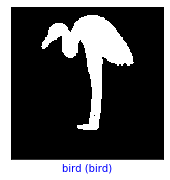

In [26]:
#Now lets look at the 3rd image 
i = 2
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i , predictions, Y, X)




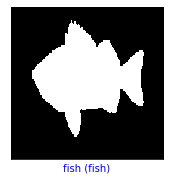

In [30]:
#Now lets look at the 12th image 
i = 6
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i , predictions, Y, X)

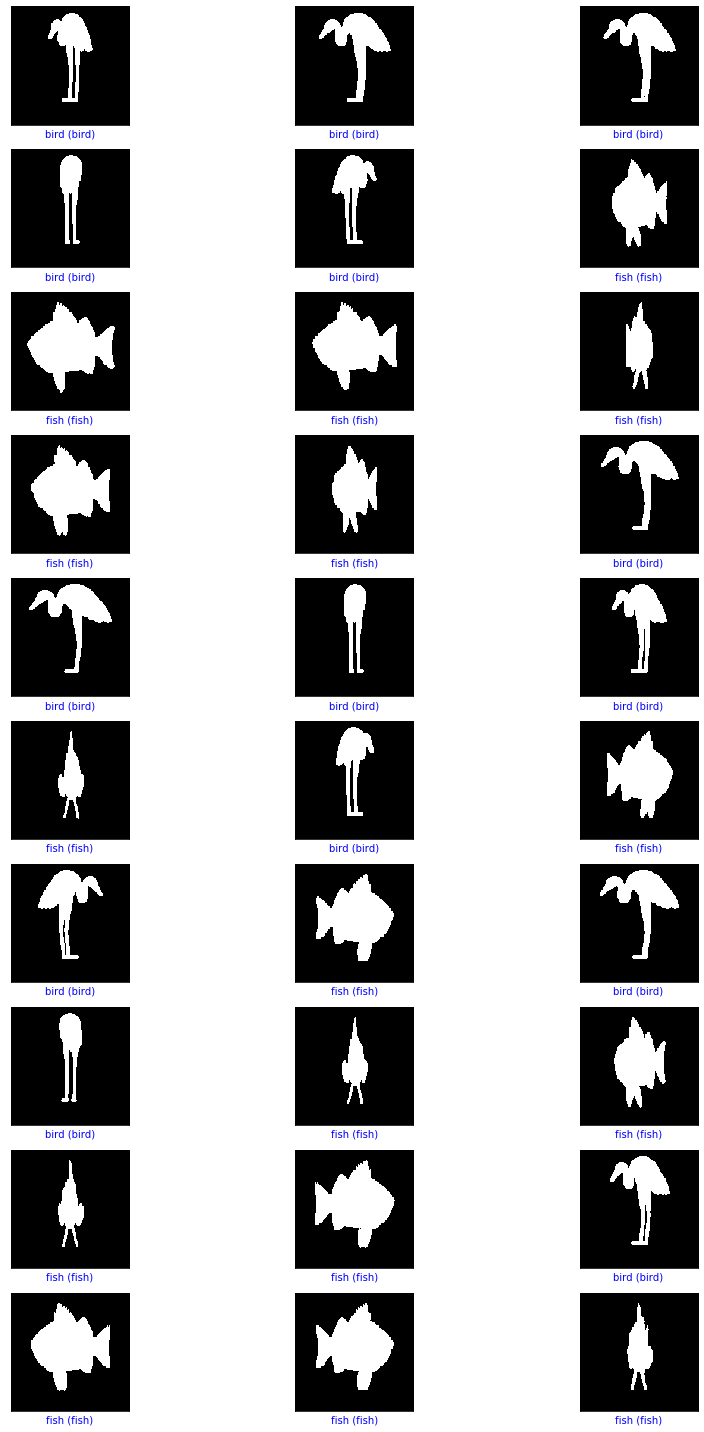

In [31]:
#Now let's plot several images with their predictions 
#Correct predictions are in blue. Incorrect predictions are in red.

num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images) :
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, Y, X)
plt.tight_layout()
plt.show()

